这个单元格给助教，请忽略!

### Score:

### Comment: 



**Collaboration:**  

Collaboration on solving the assignment is allowed, after you have thought about the problem sets on your own. It is also OK to get clarification (but not solutions) from online resources, again after you have thought about the problem sets on your own. 

There are two requirements for collaboration: 

* Cite your collaborators **fully and completely** (*e.g.*, "XXX explained to me what is asked in problem set 3"). Or cite online resources (*e.g.*, "I got inspired by reading XXX") that helped you.

* Write your scripts and report **independently** - the scripts and report must come from you only.

# 1. Significant earthquakes since 2150 B.C.
The Significant Earthquake Database contains information on destructive earthquakes from 2150 B.C. to the present. On the top left corner, select all columns and download the entire significant earthquake data file in .tsv format by clicking the Download TSV File button. Click the variable name for more information. Read the file (e.g., earthquakes-2024-10-23_09-58-40_+0800.tsv) as an object and name it Sig_Eqs.

In [2]:
# 加载数据
import pandas as pd

# 注意这里需要加制表符“\t”
Sig_Eqs = pd.read_csv("earthquakes-2024-10-26_12-11-49_+0800.tsv", sep='\t')
# 查看前几行数据以确认读取成功
Sig_Eqs.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"JORDAN: BAB-A-DARAA,AL-KARAK",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA: UGARIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN: W,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE: THERA ISLAND (SANTORINI),...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


1.1 [5 points] Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top 20 countries along with the total number of deaths.

In [3]:
# 使用Deaths列计算每个国家的死亡总人数
# 提取Year, Location Name和Deaths列，过滤掉缺失值
Sig_Eqs_filtered_deaths = Sig_Eqs[['Location Name', 'Deaths']].copy()
# 删除任何包含 NaN 值的行。
Sig_Eqs_filtered_deaths = Sig_Eqs_filtered_deaths.dropna(subset=['Deaths', 'Location Name'])

# 提取国家名称，设在Location Name中冒号前为国家名称
Sig_Eqs_filtered_deaths['Country'] = Sig_Eqs_filtered_deaths['Location Name'].str.split(':').str[0]

# 转换Deaths列为数值
Sig_Eqs_filtered_deaths['Deaths'] = pd.to_numeric(Sig_Eqs_filtered_deaths['Deaths'], errors='coerce')

# 按国家分组并计算总死亡人数
country_deaths_from_column = Sig_Eqs_filtered_deaths.groupby('Country')['Deaths'].sum().sort_values(ascending=False)

# 打印死亡人数最多的前20个国家
country_deaths_from_column.head(20)


Country
CHINA           2075947.0
TURKEY          1148745.0
IRAN             995410.0
ITALY            498418.0
SYRIA            369224.0
HAITI            323478.0
AZERBAIJAN       317219.0
JAPAN            278607.0
ARMENIA          191890.0
ISRAEL           160120.0
PAKISTAN         145080.0
ECUADOR          135496.0
IRAQ             120200.0
TURKMENISTAN     117412.0
PERU             101461.0
PORTUGAL          83547.0
GREECE            80482.0
CHILE             64270.0
INDIA             61960.0
TAIWAN            57152.0
Name: Deaths, dtype: float64

1.2 [10 points] Compute the total number of earthquakes with magnitude larger than 3.0 (use column Ms as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

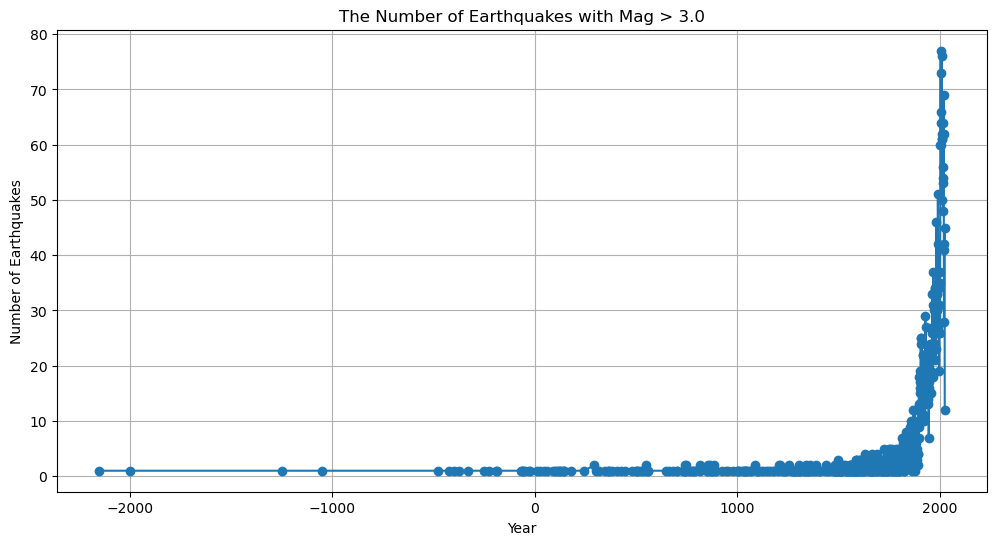

In [4]:
import matplotlib.pyplot as plt

# 过滤出震级大于 3.0 的地震事件
Ms_above_3 = Sig_Eqs[Sig_Eqs['Mag'] > 3.0]

# 按年份统计每年震级大于 3.0 的地震次数
size_above_3 = Ms_above_3.groupby('Year').size()

# 绘制时间序列图
plt.figure(figsize=(12, 6))
plt.plot(size_above_3.index, size_above_3.values, marker='o', linestyle='-')
plt.title("The Number of Earthquakes with Mag > 3.0")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.grid(True)
plt.show()


**结果**

我观察到震级大于3.0的地震数量，随时间的推移呈增长趋势，并且在2000年左右出现爆发式增长。
我认为出现这种现象的原因如下：
1. **观测手段的增加**。由图可知，在公元前的地震数量较少，而在近现代地震数量骤增，可能是因为科技的发展，现代地震监测设备的发展使得更多的地震事件被准确记录。因此，地震次数的增加可能并不完全反映真实地震活动的增长，而是监测能力的提升。
2. **人类活动的影响**。地震数量的增加可能和人类发某些活动，例如采矿，地热能开发，建造水利设施等。

1.3 [10 points] Write a function CountEq_LargestEq that returns (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) date and location of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.

In [6]:
# 定义函数 CountEq_LargestEq，增加对缺失震级值的处理
def CountEq_LargestEq(country_name, data):
    
    # 确保 country_name 是字符串类型，跳过空值
    if not isinstance(country_name, str) or pd.isna(country_name):
        return None

    # 筛选出指定国家的数据，并过滤掉缺失值
    country_data = data[(data['Location Name'].str.contains(country_name, case=False, na=False, regex=False)) & (data['Year'] >= -2150)]
    
    # 计算地震总次数
    total_earthquakes = len(country_data)
    
    # 找到震级最大的地震记录，忽略缺失值
    country_data = country_data.dropna(subset=['Mag'])
    if total_earthquakes > 0 and not country_data.empty:
        largest_eq = country_data.loc[country_data['Mag'].idxmax()]
        
        # 处理日期格式，处理缺失值情况
        year = int(largest_eq['Year'])
        month = int(largest_eq['Mo']) if pd.notna(largest_eq['Mo']) else "unknown"
        day = int(largest_eq['Dy']) if pd.notna(largest_eq['Dy']) else "unknown"
        largest_earthquake_date = f"{year}-{month}-{day}"
        
        # 返回总次数和最大地震的日期与地点信息
        return {
            'Country': country_name,
            'Total Earthquakes': total_earthquakes,
            'Largest Earthquake Date': largest_earthquake_date,
            'Largest Earthquake Location': largest_eq['Location Name'],
            'Largest Earthquake Magnitude': largest_eq['Mag']
        }
    else:
        return None

# 获取数据中的所有国家列表，并过滤掉空值
countries = [str(country).strip() for country in Sig_Eqs['Location Name'].str.split(':').str[0].unique() if isinstance(country, str) and pd.notna(country)]

# 遍历每个国家并应用 CountEq_LargestEq 函数
results = [CountEq_LargestEq(country, Sig_Eqs) for country in countries]
results = [result for result in results if result is not None]  # 过滤掉 None 值

# 将结果转换为 DataFrame，便于排序和展示
results_df = pd.DataFrame(results)

# 按总地震次数降序排列
results_df_sorted = results_df.sort_values(by='Total Earthquakes', ascending=False)
results_df_sorted



,Country,Total Earthquakes,Largest Earthquake Date,Largest Earthquake Location,Largest Earthquake Magnitude
14,CHINA,638,1950-8-15,INDIA-CHINA,8.6
33,JAPAN,419,2011-3-11,JAPAN: HONSHU,9.1
7,IRAN,404,856-12-22,"IRAN: DAMGHAN, QUMIS",7.9
77,INDONESIA,398,2004-12-26,INDONESIA: SUMATRA: ACEH: OFF WEST COAST,9.1
9,TURKEY,347,1939-12-26,TURKEY: ERZINCAN,7.8
...,...,...,...,...,...
214,TURKEY-CIS,1,1940-5-7,TURKEY-CIS,6.0
211,SOLOMON ISLANDS; NEW CALEDONIA,1,1934-7-21,SOLOMON ISLANDS; NEW CALEDONIA,7.1
209,NEPAL; INDIA,1,1934-1-15,NEPAL; INDIA: BIHAR,8.0
36,AFGHANISTAN; INDIA,1,818-5-15,AFGHANISTAN; INDIA: HINDU-KUSH; KAZAHKSTAN: ...,7.5


**解释**

1.1

加载数据时：

文件扩展名是 .tsv，即“Tab-Separated Values”（制表符分隔值），这通常意味着该文件使用制表符（\t）来分隔每一列的内容。与 .csv 文件使用逗号分隔不同，.tsv 文件一般以制表符分隔，因此在读取时需要指定 sep='\t' 告诉 Pandas 正确的分隔符。


# 2. Air temperature in Shenzhen during the past 25 years
In this problem set, we will examine how air temperature changes in Shenzhen during the past 25 years using the hourly weather data measured at the Baoan International Airport. The data set is from NOAA Integrated Surface Dataset. Download the file Baoan_Weather_1998_2022.csv, move the .csv file to your working directory.

Read page 10-11 (POS 88-92 and POS 93-93) of the comprehensive user guide for the detailed format of the air temperature data (use column TMP). Explain how you filter the data in your report.

**阅读user guide之后。我得到的信息如下：**

**POS:88-92**

空气温度观测（AIR-TEMPERATURE-OBSERVATION）空气温度

描述：空气温度的测量值。  
- 最小值：-0932  
- 最大值：+0618  
- 单位：摄氏度  
- 缩放因子：10

取值范围（DOM）：一个由数字字符（0-9）、正号（+）和负号（-）组成的通用域。  

- +9999 表示缺失值。

**POS:93-93**

空气温度观测（AIR-TEMPERATURE-OBSERVATION）空气温度质量代码

描述：用于表示空气温度观测的质量状态的代码。  
取值范围（DOM）：由 ASCII 字符集中的字符组成的特定域。

质量代码解释：
- 0 = 通过了粗略限值检查
- 1 = 通过了所有质量控制检查
- 2 = 可疑
- 3 = 错误
- 4 = 通过了粗略限值检查，数据来自 NCEI 数据源
- 5 = 通过了所有质量控制检查，数据来自 NCEI 数据源
- 6 = 可疑，数据来自 NCEI 数据源
- 7 = 错误，数据来自 NCEI 数据源
- 9 = 如果元素存在，表示通过了粗略限值检查
- A = 数据标记为可疑，但被接受为有效值
- C = 温度和露点从自动气象观测系统（AWOS）接收，且为整度数摄氏度。自动质量控制标记这些值为可疑，但仍接受为有效
- I = 数据值原本不在数据中，由验证者插入
- M = 基于 NWS 或 FAA 提供的信息进行的手动更改
- P = 数据值原本未标记为可疑，但由验证者替换
- R = 数据值被 NCEI 软件计算的值替换
- U = 数据值被编辑值替换


[

[10 points] Plot monthly averaged air temperature against the observation time. Is there a trend in monthly averaged air temperature in the past 25 years?

C:\Users\a\AppData\Local\Temp\ipykernel_1604\845046424.py:5: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Baoan_Weather_1998_2022.csv')
C:\Users\a\AppData\Local\Temp\ipykernel_1604\845046424.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = data.resample('M', on='DATE')['TMP'].mean() / 10


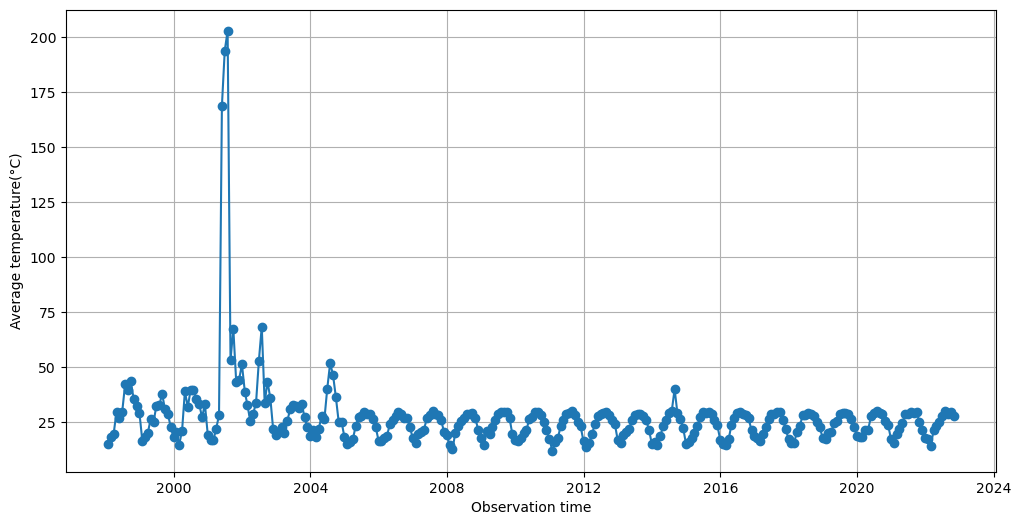

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设你的数据在一个CSV文件中
data = pd.read_csv('Baoan_Weather_1998_2022.csv')

# 数据清理
data['TMP'] = data['TMP'].replace('+9999', pd.NA)  # 替换缺失值
data['TMP'] = data['TMP'].str.split(',', expand=True)[0]  # 仅保留温度部分
data['TMP'] = pd.to_numeric(data['TMP'], errors='coerce')  # 转换为浮点数

# 将DATE列转为日期格式
data['DATE'] = pd.to_datetime(data['DATE'])

# 按月分组并计算平均气温，注意要除以10，因为user guide里写着“缩放因子：10”
monthly_avg_temp = data.resample('M', on='DATE')['TMP'].mean() / 10

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o')
plt.xlabel('Observation time')
plt.ylabel('Average temperature(°C)')
plt.grid()
plt.show()


## 趋势：
1. 过去25年中，月平均气温大体上以年为周期进行波动。
2. 2002年出现异常值，这里的气味异常大。可能的原因是测量气温的仪器出现问题，从而导致测量结果出现偏差。
3. 205年之前的趋势变化浮动较大，除了测量仪器的影响，还有一种可能是当时的科学技术不成熟，使得测量结果的准确性较低。

# 3. Global collection of hurricanes
The International Best Track Archive for Climate Stewardship (IBTrACS) project is the most complete global collection of tropical cyclones available. It merges recent and historical tropical cyclone data from multiple agencies to create a unified, publicly available, best-track dataset that improves inter-agency comparisons. IBTrACS was developed collaboratively with all the World Meteorological Organization (WMO) Regional Specialized Meteorological Centers, as well as other organizations and individuals from around the world.

In this problem set, we will use all storms available in the IBTrACS record since 1842. Download the file ibtracs.ALL.list.v04r00.csv, move the .csv file to your working directory. Read Column Variable Descriptions for variables in the file. Examine the first few lines of the file.

Below we provide an example to load the file as a pandas dataframe. Think about the options being used and why, and modify when necessary.

In [8]:
# 加载数据
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'],
                 low_memory=False)
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,,,,main,0,0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,,,,main,0,0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,,,,main,0,0,__________P___


这段代码的作用是从 CSV 文件中加载前 17 列的数据，并对特定行和缺失值进行处理，确保日期列被正确解析，最终返回一个格式化的 DataFrame

3.1 [5 points] Group the data on Storm Identifie (SID), report names (NAME) of the 10 largest hurricanes according to wind speed (WMO_WIND)

In [9]:
# 将WMO_WIND列转换为数值类型，并将非数值数据转换为NaN
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')

# 删除WMO_WIND列中为空值的行，因为这些行没有风速数据
df_cleaned = df.dropna(subset=['WMO_WIND'])

# 按SID和NAME分组，并计算每个飓风的最大风速
storm_max_wind = df_cleaned.groupby(['SID', 'NAME'], as_index=False)['WMO_WIND'].max()

# 按风速降序排序，获取前10个风速最高的飓风
top_hurricanes = storm_max_wind.sort_values(by='WMO_WIND', ascending=False)
top_hurricanes.head(10)

,SID,NAME,WMO_WIND
3633,2015293N13266,PATRICIA,185.0
830,1980214N11330,ALLEN,165.0
1480,1988253N12306,GILBERT,160.0
2842,2005289N18282,WILMA,160.0
2226,1997253N12255,LINDA,160.0
3940,2019236N10314,DORIAN,160.0
3157,2009288N07267,RICK,155.0
3776,2017242N16333,IRMA,155.0
2832,2005261N21290,RITA,155.0
2308,1998295N12284,MITCH,155.0


3.2 [5 points] Make a bar chart of the wind speed (WMO_WIND) of the 20 strongest-wind hurricanes.

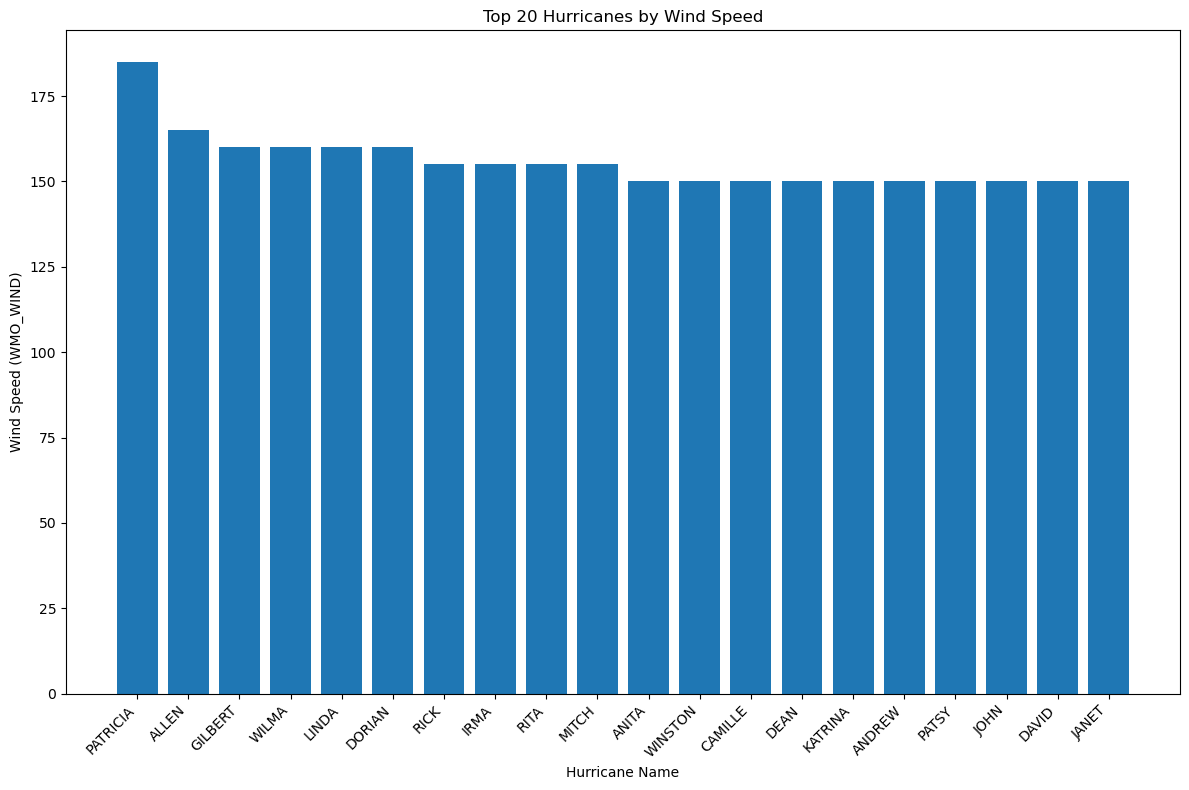

In [10]:
import matplotlib.pyplot as plt
# 获取风速排名前20的飓风数据
top_20_hurricanes = top_hurricanes.head(20)

# 绘制柱状图
plt.figure(figsize=(12, 8))                         # 设置图表大小
plt.bar(top_20_hurricanes['NAME'], top_20_hurricanes['WMO_WIND'])  # 绘制柱状图
plt.xlabel('Hurricane Name')                        # 设置x轴标签
plt.ylabel('Wind Speed (WMO_WIND)')                 # 设置y轴标签
plt.title('Top 20 Hurricanes by Wind Speed')        # 设置图表标题
plt.xticks(rotation=45, ha='right')                 # x轴标签旋转45度，向右对齐
plt.tight_layout()                                  # 自动调整布局
plt.show()                                          # 显示图表

3.3 [5 points] Plot the count of all datapoints by Basin as a bar chart.

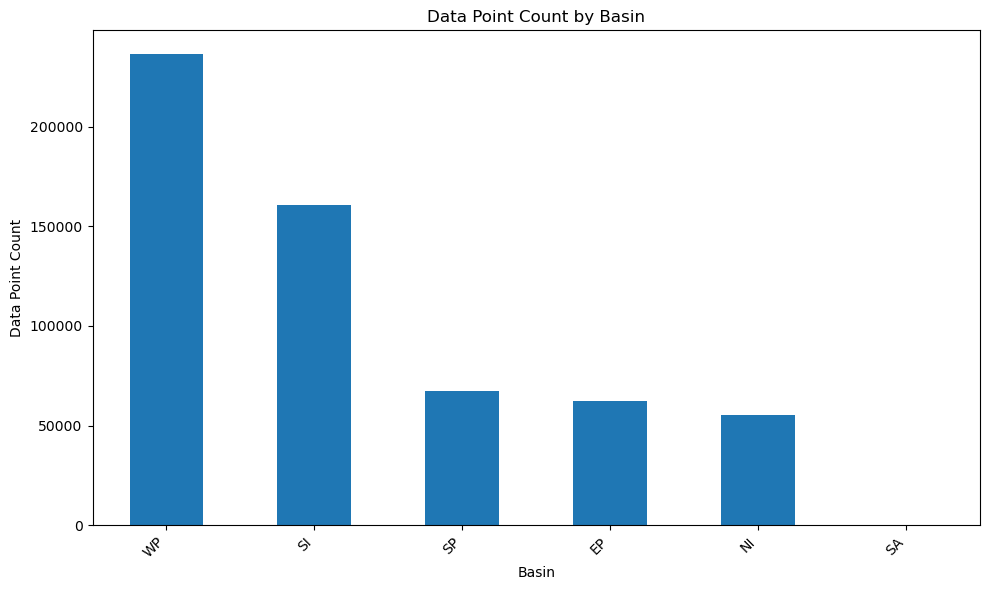

In [11]:
# 按照BASIN列分组，计算每个盆地的数据点数量
basin_counts = df['BASIN'].value_counts()

# 绘制柱状图
plt.figure(figsize=(10, 6))
basin_counts.plot(kind='bar')
plt.xlabel('Basin')
plt.ylabel('Data Point Count')
plt.title('Data Point Count by Basin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3.4 [5 points] Make a hexbin plot of the location of datapoints in Latitude and Longitude.

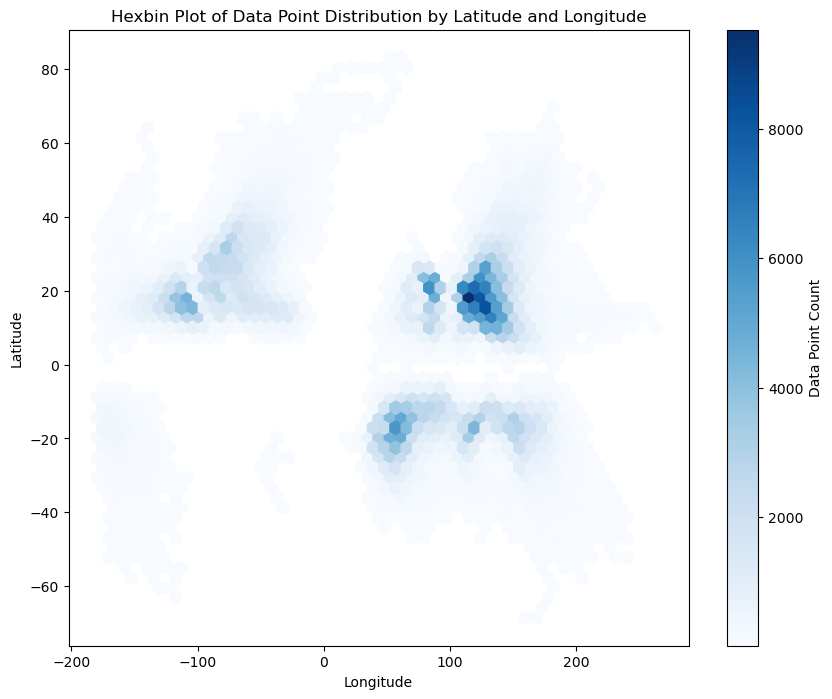

In [12]:
# 确保经纬度列转换为数值型
df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
df['LON'] = pd.to_numeric(df['LON'], errors='coerce')

# 删除经纬度为空的行
df_cleaned = df.dropna(subset=['LAT', 'LON'])

# 绘制六边形图
plt.figure(figsize=(10, 8))
plt.hexbin(df_cleaned['LON'], df_cleaned['LAT'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Data Point Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Data Point Distribution by Latitude and Longitude')
plt.show()

3.5 [5 points] Find Typhoon Mangkhut (from 2018) and plot its track as a scatter plot.

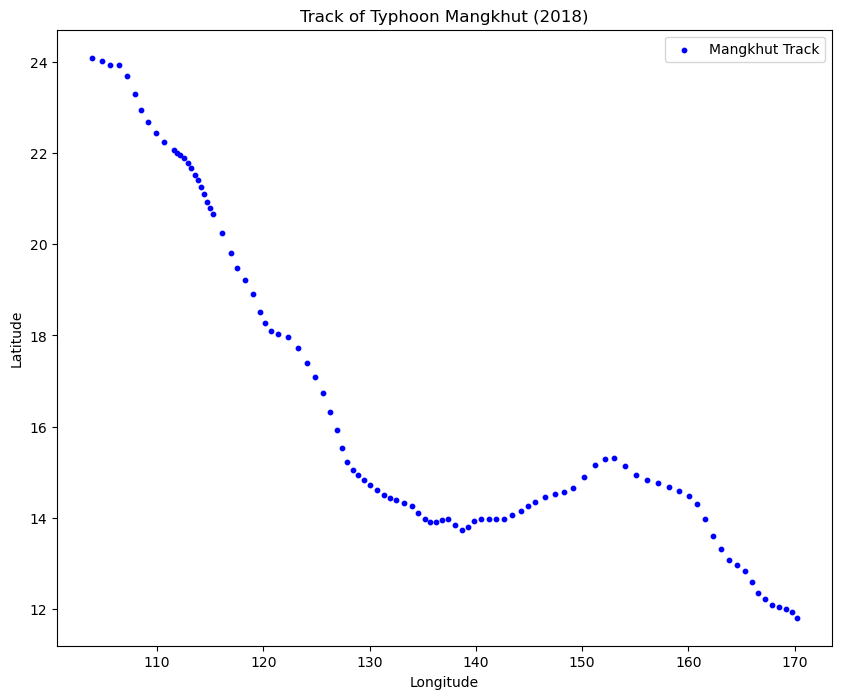

In [13]:
# 将年份从ISO_TIME列中提取，方便筛选年份
df['YEAR'] = df['ISO_TIME'].dt.year

# 筛选出2018年“山竹”台风的数据
mangkhut_df = df.loc[(df['NAME'] == 'MANGKHUT') & (df['YEAR'] == 2018)].copy()

# 确保经纬度数据为数值类型
mangkhut_df['LAT'] = pd.to_numeric(mangkhut_df['LAT'], errors='coerce')
mangkhut_df['LON'] = pd.to_numeric(mangkhut_df['LON'], errors='coerce')

# 删除经纬度为空的行
mangkhut_df = mangkhut_df.dropna(subset=['LAT', 'LON'])

# 绘制散点图展示台风山竹的路径
plt.figure(figsize=(10, 8))
plt.scatter(mangkhut_df['LON'], mangkhut_df['LAT'], c='blue', marker='o', s=10, label='Mangkhut Track')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Track of Typhoon Mangkhut (2018)')
plt.legend()
plt.show()

3.6 [5 points] Create a filtered dataframe that contains only data since 1970 from the Western North Pacific (“WP”) and Eastern North Pacific (“EP”) Basin. Use this for the rest of the problem set.

In [14]:
# 提取年份信息，方便筛选1970年及之后的数据
df['YEAR'] = df['ISO_TIME'].dt.year

# 筛选1970年及之后，且BASIN为“WP”或“EP”的数据
filtered_df = df[(df['YEAR'] >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]
# filtered_df.to_csv('test.csv', index=False)

# 查看过滤后的数据框
filtered_df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,YEAR
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006,tokyo,main,1088,1088,_OO___________,1970
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,,,main,1109,1109,_PP___________,1970
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002,tokyo,main,1143,1143,_OO___________,1970
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,,,main,1171,1168,_PP___________,1970
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998,tokyo,main,1182,1179,_OO___________,1970


3.7 [5 points] Plot the number of datapoints per day.

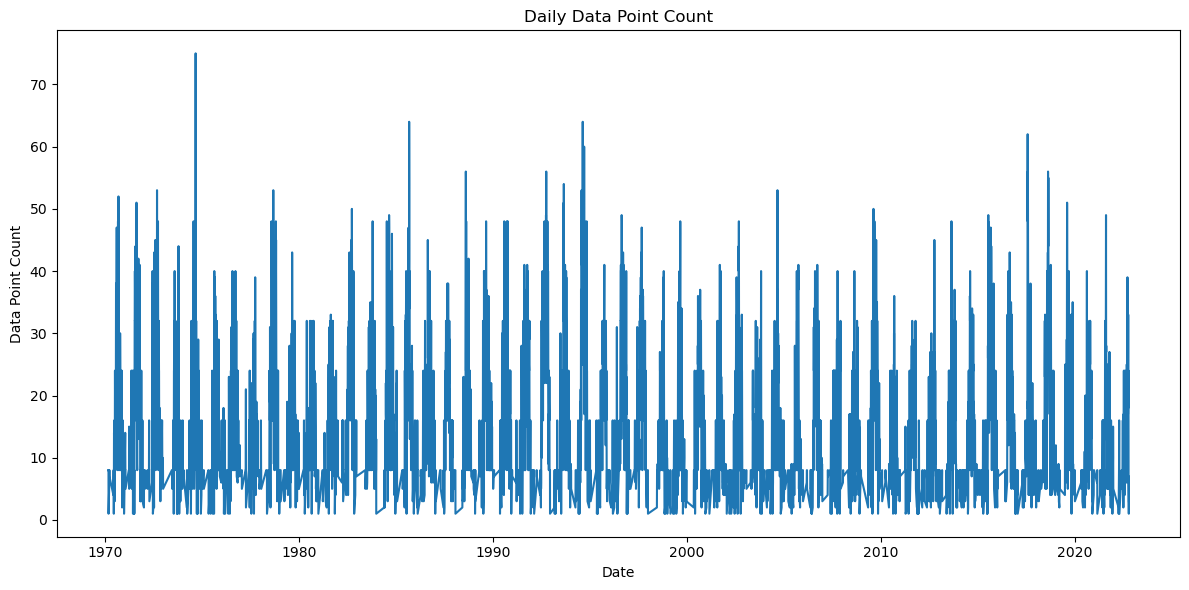

In [15]:
# 创建 filtered_df 的副本
filtered_df_copy = filtered_df.copy()

# 确保 ISO_TIME 列是日期格式，并提取日期部分创建新列
filtered_df_copy['ISO_DATE'] = filtered_df_copy['ISO_TIME'].dt.date

# 按日期计数数据点数量
daily_counts = filtered_df_copy.groupby('ISO_DATE').size()

# 绘制每日数据点数量的图表
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.xlabel('Date')
plt.ylabel('Data Point Count')
plt.title('Daily Data Point Count')
plt.tight_layout()
plt.show()


3.8 [5 points] Calculate the climatology of datapoint counts as a function of day of year. The day of year is the sequential day number starting with day 1 on January 1st.

In [16]:
# 创建 filtered_df 的副本
filtered_df_copy = filtered_df.copy()

# 提取每条记录在一年中的天数
filtered_df_copy['DAY_OF_YEAR'] = filtered_df_copy['ISO_TIME'].dt.dayofyear
filtered_df_copy['YEAR'] = filtered_df_copy['ISO_TIME'].dt.year  # 提取年份以便统计年份数量

# 统计包含的年份数量（从1970年到当前数据的最后一年）
num_years = filtered_df_copy['YEAR'].nunique()

# 按天数（DAY_OF_YEAR）分组，计算每一天的数据点总数并除以年份数量
daily_climatology = filtered_df_copy.groupby('DAY_OF_YEAR').size() / num_years

# 查看气候学平均值的结果
daily_climatology.head(10)  # 显示前10天的平均数据点数量


DAY_OF_YEAR
1     1.566038
2     1.358491
3     1.396226
4     1.754717
5     1.981132
6     2.283019
7     2.132075
8     2.735849
9     2.603774
10    2.584906
dtype: float64

3.9 [5 points] Calculate the anomaly of daily counts from the climatology.

In [17]:
# 确保 'filtered_df_copy' 包含 'DAY_OF_YEAR' 列和 'ISO_DATE' 列
filtered_df_copy['ISO_DATE'] = filtered_df_copy['ISO_TIME'].dt.date  # 提取日期部分
filtered_df_copy['DAY_OF_YEAR'] = filtered_df_copy['ISO_TIME'].dt.dayofyear  # 提取一年中的天数

# 计算每日数据点数量
daily_counts = filtered_df_copy.groupby('ISO_DATE').size()  # 按日期分组计算每日数据点数量

# 将每日数据点数量转换为 DataFrame，并提取每一天的“天数”
daily_counts_df = daily_counts.reset_index(name='DAILY_COUNT')
daily_counts_df['DAY_OF_YEAR'] = pd.to_datetime(daily_counts_df['ISO_DATE']).dt.dayofyear

# 合并气候学平均值
# 使用 map() 函数将 daily_climatology 的值映射到对应的 DAY_OF_YEAR
daily_counts_df['CLIMATOLOGY_MEAN'] = daily_counts_df['DAY_OF_YEAR'].map(daily_climatology)

# 计算异常值：每日数据点数量 - 气候学平均值
daily_counts_df['ANOMALY'] = daily_counts_df['DAILY_COUNT'] - daily_counts_df['CLIMATOLOGY_MEAN']

# 查看结果
daily_counts_df[['ISO_DATE', 'DAILY_COUNT', 'CLIMATOLOGY_MEAN', 'ANOMALY']].head(10)


,ISO_DATE,DAILY_COUNT,CLIMATOLOGY_MEAN,ANOMALY
0,1970-02-19,8,0.981132,7.018868
1,1970-02-20,8,0.905660,7.094340
2,1970-02-21,8,0.811321,7.188679
3,1970-02-22,8,0.622642,7.377358
4,1970-02-23,8,0.509434,7.490566
5,1970-02-24,8,0.452830,7.547170
6,1970-02-25,8,0.603774,7.396226
7,1970-02-26,8,0.754717,7.245283
8,1970-02-27,8,1.094340,6.905660
9,1970-02-28,1,1.150943,-0.150943


3.10 [5 points] Resample the anomaly timeseries at annual resolution and plot. So which years stand out as having anomalous hurricane activity?

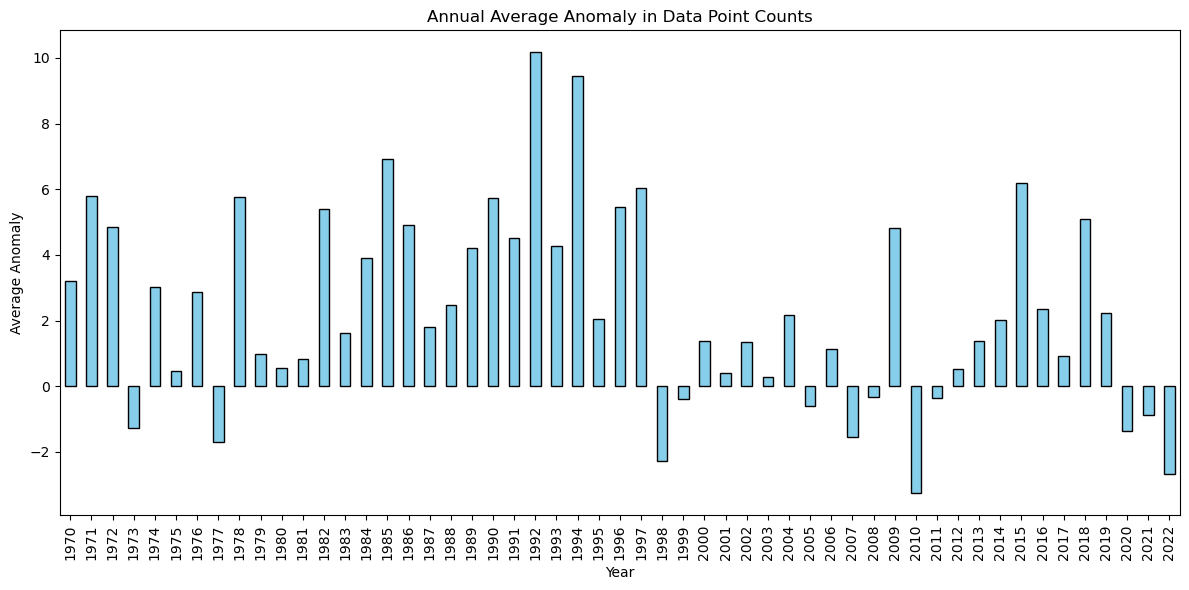

[1973, 1977, 1998, 1999, 2005, 2007, 2008, 2010, 2011, 2020, 2021, 2022]

In [18]:
# 将日期列设置为索引，方便按年份重采样
daily_counts_df['ISO_DATE'] = pd.to_datetime(daily_counts_df['ISO_DATE'])
daily_counts_df.set_index('ISO_DATE', inplace=True)

# 将异常值重采样到年分辨率，并计算每年的平均异常值
annual_anomalies = daily_counts_df['ANOMALY'].resample('YE').mean()

# 将索引格式转换为年份
annual_anomalies.index = annual_anomalies.index.year

# 绘制年平均异常值图表
plt.figure(figsize=(12, 6))
annual_anomalies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Average Anomaly')
plt.title('Annual Average Anomaly in Data Point Counts')
plt.tight_layout()
plt.show()

# 识别异常活跃的年份
anomalous_years = annual_anomalies[annual_anomalies < 0].index
anomalous_years_list = anomalous_years.tolist()

anomalous_years_list


# 4. Explore a data set
Browse the National Centers for Environmental Information (NCEI) or Advanced Global Atmospheric Gases Experiment (AGAGE) website. Search and download a data set you are interested in. You are also welcome to use data from your group in this problem set. But the data set should be in csv, XLS, or XLSX format, and have temporal information.

4.1 [5 points] Load the csv, XLS, or XLSX file, and clean possible data points with missing values or bad quality.

In [19]:
import pandas as pd

df = pd.read_csv('USW00013880.csv')
# 计算每列的缺失值数量
missing_counts = df.isnull().sum()

# 删除缺失值数量大于200的列
df_cleaned = df.loc[:, missing_counts <= 200]
df_cleaned.head()

C:\Users\a\AppData\Local\Temp\ipykernel_1604\1566754028.py:3: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,105,115,119,121,123,125,127,129,131,133,135,137,139,141,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('USW00013880.csv')


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USW00013880,1937/3/1,32.89945,-80.0407,11.8,"CHARLESTON INTL. AIRPORT, SC US",0.0,",,Z,2400",0.0,",,Z,",0.0,",,Z,",72.0,",,Z",NaN,NaN
1,USW00013880,1937/3/2,32.89945,-80.0407,11.8,"CHARLESTON INTL. AIRPORT, SC US",0.0,",,Z,2400",0.0,",,Z,",0.0,",,Z,",144.0,",,Z",0.0,",,Z"
2,USW00013880,1937/3/3,32.89945,-80.0407,11.8,"CHARLESTON INTL. AIRPORT, SC US",0.0,",,Z,2400",0.0,",,Z,",0.0,",,Z,",172.0,",,Z",-17.0,",,Z"
3,USW00013880,1937/3/4,32.89945,-80.0407,11.8,"CHARLESTON INTL. AIRPORT, SC US",0.0,",,Z,2400",0.0,",,Z,",0.0,",,Z,",217.0,",,Z",22.0,",,Z"
4,USW00013880,1937/3/5,32.89945,-80.0407,11.8,"CHARLESTON INTL. AIRPORT, SC US",0.0,",,Z,2400",0.0,",,Z,",0.0,",,Z,",217.0,",,Z",122.0,",,Z"


4.2 [5 points] Plot the time series of a certain variable.

C:\Users\a\AppData\Local\Temp\ipykernel_1604\2427314419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'])
C:\Users\a\AppData\Local\Temp\ipykernel_1604\2427314419.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_tmax = df_cleaned['TMAX'].resample('Y').mean()


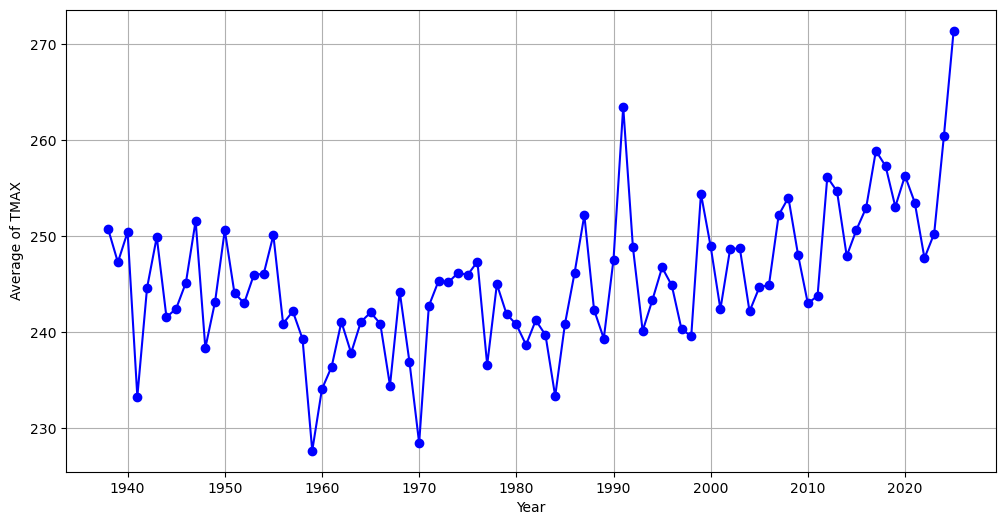

In [20]:
import matplotlib.pyplot as plt
# 转换为日期格式
df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'])  
# 将日期列设置为索引
df_cleaned.set_index('DATE', inplace=True)  

# 去掉 TMAX 列中的缺失值
df_cleaned = df_cleaned[df_cleaned['TMAX'].notnull()]

# 按年重采样，计算每年的平均值
yearly_tmax = df_cleaned['TMAX'].resample('Y').mean()

# 绘制最大温度的时间序列图像
plt.figure(figsize=(12, 6))
plt.plot(yearly_tmax.index, yearly_tmax, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Average of TMAX')
plt.grid()
plt.show()

4.3 [5 points] Conduct at least 5 simple statistical checks with the variable, and report your findings.

#### 1. 输出降水量年平均量大于40mm的年份；

In [21]:
# 1. 输出降水量年平均量大于40mm的年份；
# PRCP:降水量：
# 将PRCP列转换为数值类型，若有无法转换的值将其设为NaN
df['PRCP'] = pd.to_numeric(df['PRCP'], errors='coerce')

# 将DATE列转换为datetime格式
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# 从DATE列中提取年份，并创建一个新的YEAR列
df['YEAR'] = df['DATE'].dt.year

# 计算每年的平均降水量，并筛选出年平均降水量大于20mm的年份
annual_prcp_avg = df.groupby('YEAR')['PRCP'].mean()
years_with_prcp_above_20mm = annual_prcp_avg[annual_prcp_avg > 40].index.tolist()

# 输出结果
years_with_prcp_above_20mm




[1941,
 1945,
 1947,
 1948,
 1957,
 1958,
 1959,
 1962,
 1964,
 1971,
 1973,
 1979,
 1994,
 1997,
 1998,
 2002,
 2010,
 2013,
 2015,
 2016,
 2018,
 2021,
 2024]

#### 2.降水量大于0的天数

In [22]:
# 2. 降水量大于0的天数
# 计算降水量大于0的天数
days_with_precipitation = df[df['PRCP'] > 0].shape[0]
days_with_precipitation


9859

#### 3.输出最大温度大于370华氏度的年份

In [23]:
# TMAX:最大温度
# 3. 输出最大温度大于370华氏度的年份
# 将TMAX列转换为数值类型，若有无法转换的值将其设为NaN
df['TMAX'] = pd.to_numeric(df['TMAX'], errors='coerce')

# 筛选出最大温度大于200华氏度的年份
years_with_tmax_above_200 = df[df['TMAX'] > 370]['YEAR'].unique().tolist()

years_with_tmax_above_200


[1938,
 1939,
 1940,
 1942,
 1943,
 1944,
 1947,
 1948,
 1949,
 1950,
 1952,
 1954,
 1959,
 1968,
 1970,
 1977,
 1978,
 1980,
 1981,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1990,
 1993,
 1995,
 1996,
 1998,
 1999,
 2000,
 2002,
 2005,
 2007,
 2008,
 2010,
 2011,
 2014,
 2015,
 2016,
 2019,
 2024]

#### 4.最低温度小于0的数据点的数量

In [24]:
# TMIN:最低温度
# 4. 最低温度小于0的数据点的数量
# 将TMIN列转换为数值类型，若有无法转换的值将其设为NaN
df['TMIN'] = pd.to_numeric(df['TMIN'], errors='coerce')

# 计算最低温度小于0的数据点数量
count_tmin_below_0 = df[df['TMIN'] < 0].shape[0]
count_tmin_below_0


2239

#### 5. 输出每年数据点的数量，并画图

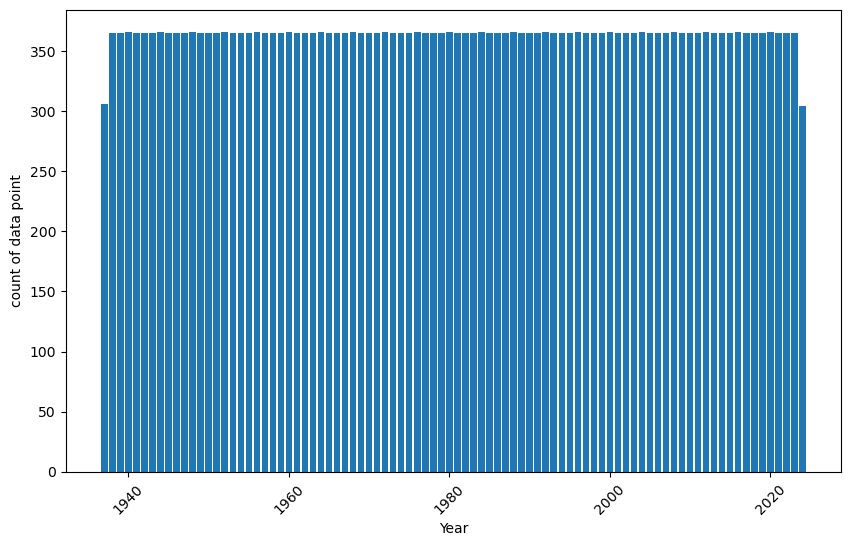

YEAR
1937    306
1938    365
1939    365
1940    366
1941    365
       ... 
2020    366
2021    365
2022    365
2023    365
2024    304
Name: count, Length: 88, dtype: int64

In [25]:
# 5. 输出每年数据点的数量，并画图
import matplotlib.pyplot as plt

# 计算每年的数据点数量
data_points_per_year = df['YEAR'].value_counts().sort_index()

# 绘制每年数据点数量的柱状图
plt.figure(figsize=(10, 6))
plt.bar(data_points_per_year.index, data_points_per_year.values)
plt.xlabel("Year")
plt.ylabel("count of data point")
plt.xticks(rotation=45)
plt.show()

data_points_per_year
